In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the Pauli-X gate (NOT gate)
X = np.array([[0, 1],
              [1, 0]])

# Define the Pauli-Z gate
Z = np.array([[1, 0],
              [0, -1]])

# Define the Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1],
                                [1, -1]])

# Define the CNOT gate
CNOT = np.array([[1, 0, 0, 0], 
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# Identity gate
I = np.eye(2)

def initialize_state(num_qubits):
    """Initialize the statevector in |000...0> state for the given number of qubits."""
    statevector = np.zeros(2**num_qubits, dtype=complex)
    statevector[0] = 1  # The |000...0> state
    return statevector

def reverse_binary_index(index, num_qubits):
    """Reverse the binary representation of an index."""
    binary_index = np.binary_repr(index, width=num_qubits)  # Get binary string of the index
    reversed_binary_index = binary_index[::-1]  # Reverse the binary string
    return int(reversed_binary_index, 2)  # Convert back to an integer

def apply_single_qubit_gate(state, gate, qubit_index, num_qubits):
    """Apply a single-qubit gate to the specified qubit, with reversed qubit order."""
    full_gate = np.array([1], dtype=complex)  # Start with a scalar (identity-like)

    # Build the full gate using Kronecker product
    for i in range(num_qubits):
        if i == qubit_index:
            full_gate = np.kron(full_gate, gate)
        else:
            full_gate = np.kron(full_gate, I)
    
    # Apply the gate to the state
    return np.dot(full_gate, state)

def apply_cnot_gate(state, control_index, target_index, num_qubits):
    """Apply the CNOT gate between two qubits in reversed order."""
    
    # Create a new state to hold the result
    new_state = np.zeros_like(state, dtype=complex)
    
    # Iterate through all basis states
    for i in range(2**num_qubits):
        # Reverse the binary representation of the index
        rev_i = reverse_binary_index(i, num_qubits)
        
        # Get the bits of the reversed index
        bits = np.binary_repr(rev_i, width=num_qubits)
        bits = list(map(int, bits))  # Convert to a list of integers
        
        # Apply CNOT logic: If control is 1, flip the target qubit
        if bits[control_index] == 1 and target_index < num_qubits:
            bits[target_index] ^= 1  # Flip the target qubit
        
        # Convert the modified bits back to an index (reversed binary order)
        new_index = int(''.join(map(str, bits)), 2)
        new_rev_index = reverse_binary_index(new_index, num_qubits)
        
        # Update the state in reversed order
        new_state[new_rev_index] += state[rev_i]  # Accumulate the state correctly
    
    return new_state

def quantum_circuit(num_qubits):
    """Define a quantum circuit and apply gates sequentially."""
    # Initialize the state |000...0>
    state = initialize_state(num_qubits)

    # Apply gates in sequence
    print("Initial state:", state)

    # Apply Hadamard gate to the first qubit
    state = apply_single_qubit_gate(state, H, 0, num_qubits)
    print("After applying H on qubit 0:", state)

    # Apply CNOT gate only if we have at least 2 qubits
    if num_qubits > 1:
        state = apply_cnot_gate(state, 0, 1, num_qubits)
        print("After applying CNOT with control qubit 0 and target qubit 1:", state)

    # Apply X gate to the second qubit only if we have at least 2 qubits
    if num_qubits > 1:
        state = apply_single_qubit_gate(state, X, 1, num_qubits)
        print("After applying X on qubit 1:", state)

    return state

def measure_runtime(num_qubits):
    """Measure the runtime for simulating the quantum circuit with num_qubits."""
    start_time = time.time()
    quantum_circuit(num_qubits)
    end_time = time.time()
    return end_time - start_time

# Measure and plot runtimes for different numbers of qubits
qubit_counts = range(1, 11)  # From 1 to 10 qubits
runtimes = []

for n in qubit_counts:
    runtime = measure_runtime(n)
    runtimes.append(runtime)
    print(f"Runtime for {n} qubits: {runtime:.6f} seconds")




Initial state: [1.+0.j 0.+0.j]
After applying H on qubit 0: [0.70710678+0.j 0.70710678+0.j]
Runtime for 1 qubits: 0.000997 seconds
Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying H on qubit 0: [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
After applying CNOT with control qubit 0 and target qubit 1: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
After applying X on qubit 1: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Runtime for 2 qubits: 0.002067 seconds
Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying H on qubit 0: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
After applying CNOT with control qubit 0 and target qubit 1: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
After applying X on qubit 1: [0.        +0.j 0.70710678+0.j 0.70710678+

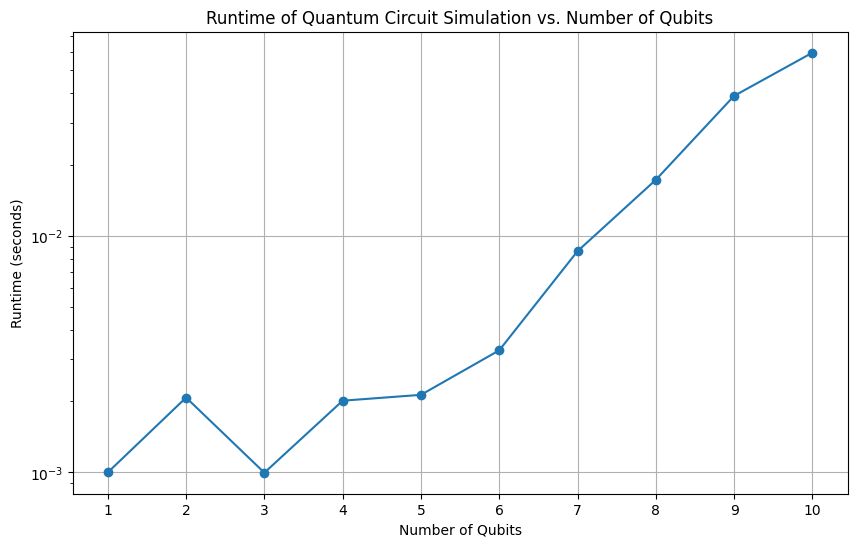

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_counts, runtimes, marker='o')
plt.title("Runtime of Quantum Circuit Simulation vs. Number of Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xticks(qubit_counts)
plt.grid()
plt.show()

Bonus Part:- Sampling states randomly from the statevector representation

In [17]:
import numpy as np
# Function to sample from a quantum statevector
def sample_from_state(state_vector, num_samples=1):
    # Compute probabilities as squared magnitudes of the amplitudes
    probabilities = np.abs(state_vector.flatten()) ** 2
    
    # Ensure the probabilities sum to 1 due to possible rounding errors
    probabilities /= np.sum(probabilities)
    
    # Generate samples based on these probabilities
    num_basis_states = len(probabilities)
    basis_states = np.arange(num_basis_states)  # Basis states are 0, 1, 2, ..., 2^n - 1
    samples = np.random.choice(basis_states, p=probabilities, size=num_samples)
    
    return samples

# Example statevector for a 3-qubit system (8 possible basis states)
state_vector = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2), 0, 0, 0, 0], dtype=complex)

# Sample 5 measurements from the quantum state
samples = sample_from_state(state_vector, num_samples=5)
print("Sampled basis states:", samples)


Sampled basis states: [0 3 3 3 3]


In [18]:
# Function to compute the expectation value of an operator
def compute_expectation_value(state_vector, operator):
    # Apply the operator to the state vector
    new_state = np.dot(operator, state_vector)
    
    # Compute the inner product of the original state and the new state
    expectation_value = np.dot(state_vector.conj().T, new_state)
    
    return np.real(expectation_value)  # Expectation values are real for Hermitian operators

# Example: Pauli-X operator
X = np.array([[0, 1], [1, 0]])

# Example 1-qubit statevector (in superposition)
state_vector = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)

# Compute expectation value of the Pauli-X operator
expectation_X = compute_expectation_value(state_vector, X)
print("Expectation value of Pauli-X:", expectation_X)


Expectation value of Pauli-X: 0.9999999999999998
